In [43]:
%pip install plotly[express]
%pip install kaggle

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [186]:
import pandas as pd
import numpy as np
import plotly.express as px 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import os
import zipfile
from kaggle.api.kaggle_api_extended import KaggleApi
import scipy.stats as stats
from scipy.stats import shapiro
import os

In [45]:
%run "../src/descarga remota.py"

Iniciando descarga del dataset: titanic
Descarga completada. Archivos guardados en: ../data
Descomprimiendo titanic.zip...
Archivo titanic.zip descomprimido y eliminado.

¡Proceso de descarga y extracción finalizado con éxito!


In [199]:
BASE_DIR = os.getcwd() ##acceder a la carpeta del notebook, ruta absoluta de la carpeta

csv_dir = os.path.join(BASE_DIR, '..', 'outputs', 'tablas') ##suba un nivel y acceda a la carpeta data
graph_dir = os.path.join(BASE_DIR, '..', 'outputs', 'graficos')

def exportar_tabla(data, name):
    df_path = os.path.join(csv_dir, name+".csv")  #cree la ruta del archivo

    if not os.path.exists(csv_dir):  #revise existencia del archivo

        print(f"Exportando tabla a: {csv_dir}")
        data.to_csv(df_path, index=False, encoding='utf-8')
        print("Exportación de tabla completada.")
    else:
        print(f"El archivo '{name}.csv' ya existe en {csv_dir}. No se exportó.")
    
def exportar_grafica(figure,name):

    graph_path = os.path.join(graph_dir, name + ".png")

    if not os.path.exists(graph_path):
        print(f"Exportando gráfico a: {graph_path}")

        figure.savefig(graph_path, dpi=300, bbox_inches='tight') 
        print("Exportación de gráfico completada.")
    else:
        print(f"El archivo '{name}.png' ya existe en {graph_dir}. No se exportó.")





In [46]:
df_test = pd.read_csv("../data/test.csv")
df_train = pd.read_csv("../data/train.csv")

In [47]:
print("DataFrame de test.csv: ")
display(df_test.head(5))

print("DataFrame de train.csv: ")
display(df_train.head(5))

DataFrame de test.csv: 


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


DataFrame de train.csv: 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Descripción variables 
## (que representa cada una y un breve analisis estadistico basico)

Basta con observar el apartado **Data Dictionary** en la pagina de [kaggle](https://www.kaggle.com/competitions/titanic/data) y es posible observar el significado de cada variable.

## Descripción de Variables del Conjunto de Datos

| Variable | Definición | Key (Clave) |
| :--- | :--- | :--- |
| **survival** | Supervivencia | 0 = No, 1 = Sí |
| **pclass** | Clase del billete/boleto | 1 = 1ra, 2 = 2da, 3 = 3ra |
| **sex** | Sexo | |
| **Age** | Edad en años | |
| **sibsp** | # de hermanos / cónyuges a bordo del Titanic | |
| **parch** | # de padres / niños a bordo del Titanic | |
| **ticket** | Número del billete/boleto | |
| **fare** | Tarifa del pasajero | |
| **cabin** | Número de cabina | |
| **embarked** | Puerto de Embarque | C = Cherbourg, Q = Queenstown, S = Southampton |

#### Ademas se hacen otras salvedades sobre las variables

##### **pclass:** Un proxy para el estatus socioeconómico (SES)
* **1ra:** Alta (Upper)
* **2da:** Media (Middle)
* **3ra:** Baja (Lower)

---

##### **age:** Edad
* La edad es **fraccionaria** si es menor de 1 año.
* Si la edad es **estimada**, se presenta en la forma de *xx.5* (ej. 29.5).

---

##### **sibsp:** Relaciones familiares (Hermanos/Cónyuges)
El conjunto de datos define las relaciones familiares de esta manera...
* **Hermano/a:** hermano, hermana, hermanastro, hermanastra
* **Cónyuge:** marido, mujer
    > *(Se ignoraron a las amantes y prometidos/as.)*

---

##### **parch:** Relaciones familiares (Padres/Hijos)
El conjunto de datos define las relaciones familiares de esta manera...
* **Padre:** madre, padre
* **Hijo/a:** hija, hijo, hijastra, hijastro
    > **Nota:** Algunos niños viajaron solo con una niñera, por lo tanto, **parch=0** para ellos.

> Note que la variable **Survived** solo esta en **train**, **no** en **test** ya que es la **target variable**

### Información Basica de los DataFrame

In [48]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


> Aprecie que **Cabin** tiene tan solo 91 datos no nulos, un problema con el que se lideara mas adelante.

> hay 4  variables int, 5 object y 2 float

### Limpieza de datos

In [49]:
df_train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [50]:

total_duplicados_train = df_train.duplicated().sum()
total_duplicados_test = df_test.duplicated().sum()
print(f"Número total de filas duplicadas en train: {total_duplicados_train}")
print(f"Número total de filas duplicadas en test: {total_duplicados_test}")

Número total de filas duplicadas en train: 0
Número total de filas duplicadas en test: 0


> No hay duplicados

#### Limpieza df_train

Note que las columnas del Data Frame **df_train** las cuales son **Age**, **Cabin**, **Embarked**; poseen datos nulos, se procederá a analizar la mejor estrategia para lidiar con los valores nulos.

##### Limpieza columna **Age**

In [51]:
df_train["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

Se revisa cuantos datos nulos existen en la columna **Age** y se contrasta con el total de los datos.

In [52]:
df_train["Age"].isnull().sum()

np.int64(177)

In [53]:
len(df_train)

891

Se revisa cuanto porcentaje de datos nulos existe.

In [54]:
porcentaje_nulos = df_train["Age"].isnull().mean() * 100
print(f"El porcentaje de nulos en la columna'Age' es: {porcentaje_nulos:.2f}%")

El porcentaje de nulos en la columna'Age' es: 19.87%


Luego de esto, evaluamos la normalidad de la variable **Age**, para esto creamos el *Histograma* de la columna, además se evalúan la similitud entre las medidas de tendencia central.

In [55]:

fig = px.histogram(
    df_train,
    x='Age',
    nbins=30,
    title='Distribución de Edad (Age) en df_train',
    marginal='box',
    color_discrete_sequence=["#0052CC"]
)

fig.update_layout(
    xaxis_title='Edad',
    yaxis_title='Frecuencia (Conteo)',
    bargap=0.05,
    height=500
)


fig.show()

En la gráfica se puede observar un sesgo hacia la derecha, lo que indica falta de normalidad en la variable.

In [56]:
stat, p = shapiro(df_train['Age'].dropna())
print(f"Shapiro-Wilk: stat={format(stat, '.6f')}, p-value={format(p, '.10f')}")

Shapiro-Wilk: stat=0.981458, p-value=0.0000000734


Dado que p es menor que 0.05 se descarta la hipótesis de normalidad. Es decir, los datos no siguen una distribución normal.

Se decide escoger la mediana como valores para rellenar los valores de la columna **Age**.

In [57]:
df_train["Age"]=df_train["Age"].fillna(df_train["Age"].median())
df_train["Age"].isnull().sum()

np.int64(0)

Note que ahora la columna está totalmente limpia.

##### Creación de función para sistematizar la limpieza de variables numéricas.

In [58]:
#Modo de uso:
#Pase la base de datos y columna de esta, se redefine la columna en base a la serie que devuelve la función
def limpieza_datos_numericos(df,col):
    stat, p = shapiro(df[col].dropna())
    if p<=0.05:
        print("La variable no sigue una distribución normal.")
        print("Se completan los datos nulos con la mediana.")
        a=df[col].fillna(df[col].median())
        return  a
    else:
        print("La variable sigue una distribución normal.")
        print("Se completan los datos nulos con la media.")
        a=df[col].fillna(df[col].mean())
        return a

##### Limpieza columna **Cabin**

In [59]:
df_train["Cabin"]

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

Se revisa el número total de datos nulos en la columna **Cabin**

In [60]:
df_train["Cabin"].isnull().sum()

np.int64(687)

Como es una variable categorica, se completan los datos nulos con "Desconocido", ya que no podemos intuir nada con datos numéricos.

In [61]:
df_train["Cabin"]=df_train["Cabin"].fillna("Desconocido")
df_train["Cabin"]

0      Desconocido
1              C85
2      Desconocido
3             C123
4      Desconocido
          ...     
886    Desconocido
887            B42
888    Desconocido
889           C148
890    Desconocido
Name: Cabin, Length: 891, dtype: object

Note que ahora la columna está totalmente limpia.

##### Limpieza columna **Embarked**

In [62]:
df_train["Embarked"]

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

Se mira cuantos datos nulos hay en la columna **Embarked**.

In [63]:
df_train["Embarked"].isnull().sum()

np.int64(2)

Optamos por eliminar los datos, ya que son poco relevantes para la densidad que tenemos.

In [64]:
df_train=df_train.dropna(subset=["Embarked"])
df_train["Embarked"].isnull().sum()

np.int64(0)

Note que ahora la columna está totalmente limpia.

#### Limpieza df_test

In [65]:
df_test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

Note que las columnas del Data Frame **df_test** las cuales son **Age**, **Fare**, **Cabin**; poseen datos nulos, se procederá a analizar la mejor estrategia para lidiar con los valores nulos.

##### Limpieza columna **Age**

In [66]:
df_test["Age"]

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64

Miramos cuantos datos nulos hay en la columna **Age**

In [67]:
len(df_test)

418

In [68]:
df_test["Age"].isnull().sum()

np.int64(86)

Se revisa cuanto porcentaje de datos nulos existe.

In [69]:
porcentaje_nulos = df_test["Age"].isnull().mean() * 100
print(f"El porcentaje de nulos en la columna'Age' es: {porcentaje_nulos:.2f}%")

El porcentaje de nulos en la columna'Age' es: 20.57%


Utilizamos la función normalizada para la limpieza de datos numéricos

In [70]:
columna_limpia=limpieza_datos_numericos(df_test,"Age")
df_test["Age"]=columna_limpia

La variable no sigue una distribución normal.
Se completan los datos nulos con la mediana.


In [71]:
df_test["Age"].isnull().sum()

np.int64(0)

Note que ahora la columna está totalmente limpia.

##### Limpieza de la columna **Fare**

In [72]:
df_test["Fare"]

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

Se revisan la cantidad de datos nulos en la columna **Fare**

In [73]:
df_test["Fare"].isnull().sum()

np.int64(1)

Optamos por eliminar el dato, ya que es poco relevante para la densidad que tenemos.

In [74]:
df_test=df_test.dropna(subset=["Fare"])
df_test["Fare"].isnull().sum()

np.int64(0)

Note que ahora la columna está totalmente limpia.

##### Limpieza columna **Cabin**

In [75]:
df_test["Cabin"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
413     NaN
414    C105
415     NaN
416     NaN
417     NaN
Name: Cabin, Length: 417, dtype: object

Se revisa el número total de datos nulos en la columna **Cabin**

In [76]:
df_test["Cabin"].isnull().sum()

np.int64(326)

Como es una variable categorica, se completan los datos nulos con "Desconocido", ya que no podemos intuir nada con datos numéricos.

In [77]:
df_test["Cabin"]=df_test["Cabin"].fillna("Desconocido")
df_test["Cabin"]

0      Desconocido
1      Desconocido
2      Desconocido
3      Desconocido
4      Desconocido
          ...     
413    Desconocido
414           C105
415    Desconocido
416    Desconocido
417    Desconocido
Name: Cabin, Length: 417, dtype: object

Note que ahora la columna está totalmente limpia.

### Analisis estadistico basico para las variables:

In [78]:
columnas = df_train.columns   #se usa el de todas las col

In [79]:
def analizar(data1, data2, cols,nombre_base1=None, nombre_base2=None):
    for col in cols:
        try:
            desc1=data1[col].describe()
            desc2=data2[col].describe()
            if nombre_base1 and nombre_base2:
                resultado_final = pd.concat([desc1, desc2], axis=1, keys=[nombre_base1, nombre_base2])
            else:
                resultado_final = pd.concat([desc1, desc2], axis=1, keys=['DF_A', 'DF_B'])
            print(f"columna: {col}")
            print(resultado_final)
            print("\n\n\n")
        except Exception as e:
            print(f"columna no {col} esta\n\n\n")

#### analisis general y comparación entre train y test

In [80]:
# analisis general para df_test y df_train
analizar(df_test, df_train, columnas, nombre_base1="test", nombre_base2="train")

columna: PassengerId
              test       train
count   417.000000  889.000000
mean   1100.635492  446.000000
std     120.923774  256.998173
min     892.000000    1.000000
25%     996.000000  224.000000
50%    1101.000000  446.000000
75%    1205.000000  668.000000
max    1309.000000  891.000000




columna no Survived esta



columna: Pclass
             test       train
count  417.000000  889.000000
mean     2.263789    2.311586
std      0.842077    0.834700
min      1.000000    1.000000
25%      1.000000    2.000000
50%      3.000000    3.000000
75%      3.000000    3.000000
max      3.000000    3.000000






columna: Name
                            test                train
count                        417                  889
unique                       417                  889
top     Peter, Master. Michael J  Dooley, Mr. Patrick
freq                           1                    1




columna: Sex
        test train
count    417   889
unique     2     2
top     male  male
freq     265   577




columna: Age
             test       train
count  417.000000  889.000000
mean    29.525180   29.315152
std     12.628258   12.984932
min      0.170000    0.420000
25%     23.000000   22.000000
50%     27.000000   28.000000
75%     35.000000   35.000000
max     76.000000   80.000000




columna: SibSp
             test       train
count  417.000000  889.000000
mean     0.448441    0.524184
std      0.897568    1.103705
min      0.000000    0.000000
25%      0.000000    0.000000
50%      0.000000    0.000000
75%      1.000000    1.000000
max      8.000000    8.000000




columna: Parch
         

Note como las medidas de tendencia central (media) es realmente similar entre **test** y **train**, igualmente ocurre con su desviacion, y percentiles.

En variables categoricas solo hay un cambio en el conteo de datos, siendo la base mas grande aquella que corresponde al entrenamiento.

# Creación Variable **Familiares**

> Variable se basa en la suma de **SibSp**(n coyugues/hermanos abordo) y **Parch** (n hijos/padres abordo)

In [81]:
def sumar_SibSp_Parch(fila):
    return fila['SibSp'] + fila['Parch']

df_test["Familiares"] = df_test.apply(sumar_SibSp_Parch, axis=1)
df_train["Familiares"] = df_train.apply(sumar_SibSp_Parch, axis=1)

analizar(data1=df_test, data2=df_train, cols=["Familiares"], nombre_base1="test", nombre_base2="train")

columna: Familiares
             test       train
count  417.000000  889.000000
mean     0.841727    0.906637
std      1.520338    1.614703
min      0.000000    0.000000
25%      0.000000    0.000000
50%      0.000000    0.000000
75%      1.000000    1.000000
max     10.000000   10.000000






> vea que el promedio de familiares es cercano a 1, sin embargo debe existir una cantidad significativa sin familiares abordo que jalan la media, en ambos DataFrame existe un dato atipico que posee 10 familiares abordo, probablemente ambos pertenescan a la misma familia.

In [82]:
numerosos_train = df_train[df_train["Familiares"]==10]
numerosos_test = df_test[df_test["Familiares"]==10]

df_vertical = pd.concat([numerosos_train, numerosos_test], axis=0) #representar mejor los miembros de la familia numerosa
df_vertical

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familiares
159,160,0.0,3,"Sage, Master. Thomas Henry",male,28.0,8,2,CA. 2343,69.55,Desconocido,S,10
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,28.0,8,2,CA. 2343,69.55,Desconocido,S,10
201,202,0.0,3,"Sage, Mr. Frederick",male,28.0,8,2,CA. 2343,69.55,Desconocido,S,10
324,325,0.0,3,"Sage, Mr. George John Jr",male,28.0,8,2,CA. 2343,69.55,Desconocido,S,10
792,793,0.0,3,"Sage, Miss. Stella Anna",female,28.0,8,2,CA. 2343,69.55,Desconocido,S,10
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,28.0,8,2,CA. 2343,69.55,Desconocido,S,10
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.55,Desconocido,S,10
188,1080,NaN,3,"Sage, Miss. Ada",female,27.0,8,2,CA. 2343,69.55,Desconocido,S,10
342,1234,NaN,3,"Sage, Mr. John George",male,27.0,1,9,CA. 2343,69.55,Desconocido,S,10
360,1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,Desconocido,S,10


Efectivamente todos los pasejeros con 10 familiares son de la misma familia (note que todos tienen el mismo ticket)

# Union DataFrames

## Predicción variable surviverd

>antes de unir las bases de datos se prefirio crear la variable survived en el DataFrame de pruebas con un modelo predictivo.

> Dado que survived es de tipo Booleana se decide usar un modelo de clasificación, se preuba RandomForest; importando el modelos desde **sklearn**.

In [83]:
from sklearn.ensemble import RandomForestClassifier #importar el modelo desde sklearn

In [84]:
TARGET_COL = 'Survived' #variable para rellenar

In [85]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Familiares'],
      dtype='object')

In [86]:
X_train = df_train.drop(columns=[TARGET_COL, "Ticket","PassengerId" , "Cabin", "Name"]) #eliminar col target y columnas poco representativas
X_train = pd.get_dummies(X_train, columns=['Sex', 'Embarked'], drop_first=True) #codificar variables str
# y_train es la columna objetivo
y_train = df_train[TARGET_COL]


X_test = df_test.drop(columns=["Ticket","PassengerId" , "Cabin", "Name"])
X_test = pd.get_dummies(X_test, columns=['Sex', 'Embarked'], drop_first=True) #codificar variables str

In [87]:
# 3. Crear y Entrenar el Modelo
rf_model = RandomForestClassifier(n_estimators=100, #numero de arboles
                                  random_state=42) #para replicar resultados

print("Entrenando el modelo...")
rf_model.fit(X_train, y_train) 
print("Entrenamiento completado.")

predictions = rf_model.predict(X_test)

Entrenando el modelo...
Entrenamiento completado.


In [88]:
#Predecir
predicciones = rf_model.predict(X_test)

### Validación Cruzada

In [89]:
from sklearn.model_selection import cross_val_score #importar metodo de validación

In [90]:
scores = cross_val_score(
    rf_model, #modelo a evaluar (creado anteriromente)
    X_train, 
    y_train, 
    cv=5, #se separa el train en 5 partes (folds)
    scoring='accuracy' #metrica para evaluar
)

print(f"Puntuaciones individuales de CV: {scores}")
print(f"Precisión media: {scores.mean():.4f}")
print(f"Desviación estándar de CV: {scores.std():.4f}")

Puntuaciones individuales de CV: [0.79775281 0.79213483 0.86516854 0.7752809  0.83050847]
Precisión media: 0.8122
Desviación estándar de CV: 0.0320


note que la precisión media fue del 81.22%, es decir que en promedio el modelo identifica correctamente el 81.22% de pasajeros como superviviente o no.

Por el buen rendimiento se decide usar el vector **predicciones**  para llenar la col **survived** del df de **test**, no se usan metricas a partir de test ya que la naturaleza de la base (base de competicion), no nos provee de un vector y_test.

In [91]:
df_test["Survived"] = predicciones

## Unir ambos DataFrames

In [92]:
df = pd.concat([df_train, df_test], 
               ignore_index=True) #indice nuevo

df.isnull().any() #union sin fallos (por la creación de survived para el conjunto de test)

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
Familiares     False
dtype: bool

In [93]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familiares
1077,1081,0,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,Desconocido,S,0
1160,1164,1,1,"Clark, Mrs. Walter Miller (Virginia McDowell)",female,26.0,1,0,13508,136.7792,C89,C,1
650,652,1,2,"Doling, Miss. Elsie",female,18.0,0,1,231919,23.0000,Desconocido,S,1
1203,1207,1,3,"Hagardon, Miss. Kate",female,17.0,0,0,AQ/3. 30631,7.7333,Desconocido,Q,0
797,799,0,3,"Ibrahim Shawah, Mr. Yousseff",male,30.0,0,0,2685,7.2292,Desconocido,C,0


# Insights Multivariado

## ¿Sobrevivieron más mujeres que hombres?

In [136]:
df_grouped = df.groupby(['Sex', 'Survived']).size().reset_index(name='Count')
df_grouped['Supervivencia_Etiqueta'] = df_grouped['Survived'].apply(lambda x: 'Sí Sobrevivió' if x == 1 else 'No Sobrevivió')
df_grouped

,Sex,Survived,Count,Supervivencia_Etiqueta
0,female,0,114,No Sobrevivió
1,female,1,350,Sí Sobrevivió
2,male,0,695,No Sobrevivió
3,male,1,147,Sí Sobrevivió


In [122]:
fig = px.bar(
    df_grouped,
    x='Sex',                   # Eje X: Género
    y='Count',                 # Eje Y: Número de personas
    color='Supervivencia_Etiqueta', 
    barmode='group',           
    title='Conteo de Supervivientes y No Sobrevivientes por Género',
    labels={'Sex': 'Género', 'Count': 'Número de Pasajeros'},
    color_discrete_map={       
        'Sí Sobrevivió': 'green',
        'No Sobrevivió': 'red'
    }
)
fig.show()

> En cantidad las mujeres fueron las que mas sobrevivieron, con 350 superviventes

In [ ]:
df_grouped['Total_by_Sex'] = df_grouped.groupby('Sex')['Count'].transform('sum') ##aplicar la suma del total de cada genero a las filas de ese genero
df_grouped['Percentage'] = (df_grouped['Count'] / df_grouped['Total_by_Sex']) * 100 
df_grouped

,Sex,Survived,Count,Supervivencia_Etiqueta,Total_by_Sex,Percentage
0,female,0,114,No Sobrevivió,464,24.568966
1,female,1,350,Sí Sobrevivió,464,75.431034
2,male,0,695,No Sobrevivió,842,82.541568
3,male,1,147,Sí Sobrevivió,842,17.458432


>  De nuevo el porcentaje de mujeres que sobreviven es mayor que el de hombres, aunque en esta ocacion la diferencia no es tan brutal como si lo es en el conteo bruto

In [198]:
## exportar tabla
exportar_tabla(df_grouped, "supervivencia_por_genero")

El archivo 'supervivencia_por_genero.csv' ya existe en d:\Uexternado\Segundo Semestre\Programacion 2\titanic-pandas-proyecto\notebooks\..\outputs\tablas. No se exportó.


## ¿Sobrevivieron mas niños que hombres adultos?

In [179]:
df_niños_adultos = df[df['Sex'] == 'male'].copy()

df_niños_adultos['grupo etario'] = df_niños_adultos['Age'].apply(lambda x: 'niño' if x < 18 else "hombre")
df_niños_adultos.groupby('grupo etario').count()
df_niños_adultos = df_niños_adultos.groupby(['grupo etario', 'Survived']).size().reset_index(name='Count')
df_niños_adultos['Supervivencia_Etiqueta'] = df_niños_adultos['Survived'].apply(lambda x: 'Sí Sobrevivió' if x == 1 else 'No Sobrevivió')
df_niños_adultos

,grupo etario,Survived,Count,Supervivencia_Etiqueta
0,hombre,0,646,No Sobrevivió
1,hombre,1,114,Sí Sobrevivió
2,niño,0,49,No Sobrevivió
3,niño,1,33,Sí Sobrevivió


In [180]:
fig = px.bar(
    df_niños_adultos,
    x='grupo etario',                   # Eje X: Género
    y='Count',                 # Eje Y: Número de personas
    color='Supervivencia_Etiqueta', 
    barmode='group',           
    title='Conteo de Supervivientes y No Sobrevivientes por Género',
    labels={'grupo etario': 'Grupo Etario', 'Count': 'Número de Pasajeros'},
    color_discrete_map={       
        'Sí Sobrevivió': 'green',
        'No Sobrevivió': 'red'
    }
)
fig.show()

Note que la cantidad bruta de hombres adultos que sobrevivio fue mucho mayor a los menores de edad que sobrevivieron.

In [181]:
df_niños_adultos['Total por grupo etario'] = df_niños_adultos.groupby('grupo etario')['Count'].transform('sum') ##aplicar la suma del total de cada genero a las filas de ese genero
df_niños_adultos['Percentage'] = (df_niños_adultos['Count'] / df_niños_adultos['Total por grupo etario']) * 100 
df_niños_adultos

,grupo etario,Survived,Count,Supervivencia_Etiqueta,Total por grupo etario,Percentage
0,hombre,0,646,No Sobrevivió,760,85.000000
1,hombre,1,114,Sí Sobrevivió,760,15.000000
2,niño,0,49,No Sobrevivió,82,59.756098
3,niño,1,33,Sí Sobrevivió,82,40.243902


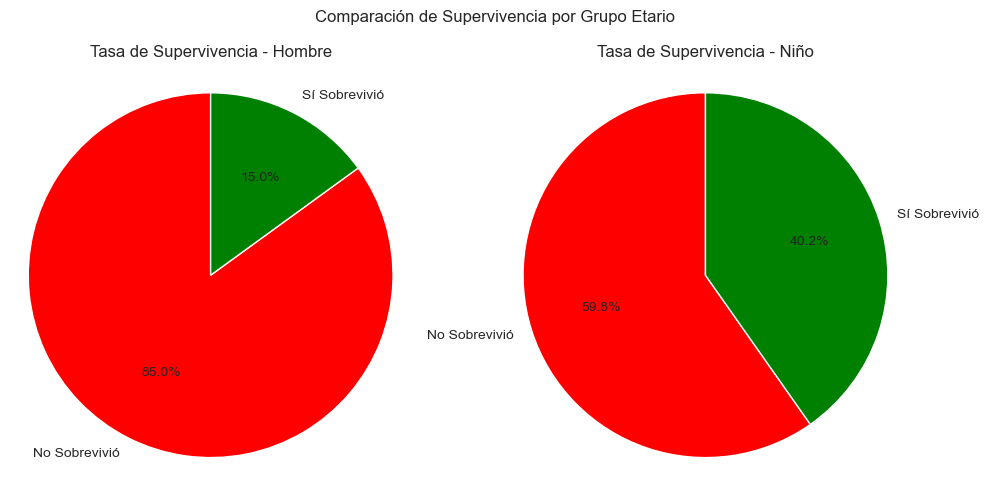

In [ ]:
df_hombre = df_niños_adultos[df_niños_adultos['grupo etario'] == 'hombre']
df_nino = df_niños_adultos[df_niños_adultos['grupo etario'] == 'niño']

fig, axes = plt.subplots(1, 2, figsize=(10, 5)) #lienzo de 1 fila y 2 columnas
plt.style.use('seaborn-v0_8-whitegrid') 

colores = ['red', 'green'] # Rojo para No Sobrevivió (0) y Verde para Sí Sobrevivió (1)

# creacion primer grafico (para hombres), dibujar primera col
axes[0].pie(
    df_hombre['Percentage'],
    labels=df_hombre['Supervivencia_Etiqueta'],
    autopct='%1.1f%%', # Muestra el porcentaje con un decimal
    startangle=90,
    colors=colores
)
axes[0].set_title('Tasa de Supervivencia - Hombre')
axes[0].axis('equal') # Asegura que el pastel sea un círculo

#dibujar segunda col
axes[1].pie(
    df_nino['Percentage'],
    labels=df_nino['Supervivencia_Etiqueta'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colores
)
axes[1].set_title('Tasa de Supervivencia - Niño')
axes[1].axis('equal')

# 3. Ajustar el layout y mostrar
plt.suptitle('Comparación de Supervivencia por Grupo Etario') # Título principal
plt.tight_layout()
plt.show()

> sin embargo porcentualmente es evidente que sobrevivieron muchos mas niños, el resultado contrario del grafico anterior se explica por la mayor cantidad de hombres adultos abordo.

In [193]:
exportar_grafica(fig,'comparacion_supervivencia_etaria')

Exportando gráfico a: d:\Uexternado\Segundo Semestre\Programacion 2\titanic-pandas-proyecto\notebooks\..\outputs\graficos\comparacion_supervivencia_etaria.png
Exportación de gráfico completada.
